# TP final - Análisis bibliométrico

**Materia:** Elementos de producción científica y tecnológica - Doctorado CyT UNQ    
**Alumna:** Julieta Arancio    
**Año:** 2019

El código puede consultarse en el repositorio https://github.com/thessaly/elementosUNQ2019

## Introducción

El problema de la falta de representación en la producción de conocimiento científico es reconocido dentro de la academia (Nature Editorial, 2018; Valantine & Collins, 2015). Ya sea en términos de género, etnia, lugar de origen, personas con discapacidades o la intersección de estos factores, constituye un problema no sólo de justicia social sino de calidad de la producción: impide la incorporación de nuevos talentos, perspectivas y preguntas (Intemann, 2009). A modo ilustrativo, África aloja al 15% de la población mundial y contribuye sólo a un 2.6% de las publicaciones científicas; sólo 28% de los investigadores a nivel global son mujeres (UNESCO, 2015).

Desde distintas posiciones se cuestiona el rol de las evaluaciones de impacto en este problema. El uso que agencias de financiación, instituciones académicas e investigadores a nivel global hacen de indicadores bibliométricos como el factor de impacto es actualmente cuestionado desde distintas posiciones (Hicks et al, 2015; Cronin et al, 2014). Uno de los riesgos de realizar evaluaciones unidimensionales utilizando el factor de impacto radica en seleccionar sólo a quienes acceden a publicar en dichas revistas y reforzar las preguntas, perspectivas y temas en agenda de sus líneas editoriales.

El objetivo de este trabajo consiste en explorar la correlación entre indicadores bibliométricos y la relevancia de las contribuciones dentro del área de mi tesis doctoral, los estudios sociales de la ciencia y tecnología (o STS por sus siglas en inglés). Se espera que la comparación entre información cualitativa proveniente de expertos e indicadores bibliométricos ampliamente difundidos ilumine aspectos y abra nuevas preguntas sobre qué constribuciones consideramos relevantes en STS.

## Métodos

A fin de obtener datos cualitativos sobre contribuciones significativas al campo STS, parto del análisis de [Sovacool, B. K., & Hess, D. J. (2017). Ordering theories: Typologies and conceptual frameworks for sociotechnical change. Social studies of science, 47(5), 703-750.](https://journals.sagepub.com/doi/full/10.1177/0306312717709363). 

El artículo presenta los resultados y análisis de una consulta a 35 expertos sobre cuáles son las teorías más relevantes o utilizadas para estudiar la dinámica de las relaciones entre ciencia, tecnología y sociedad. 

La elección del artículo se fundamenta en: 
- su relevancia para la disciplina, 
- los autores son referencia en la materia, 
- identifica una comunidad de expertos y 
- el acceso abierto a los dos [datasets](https://journals.sagepub.com/doi/suppl/10.1177/0306312717709363) producidos: listado de 35 expertos entrevistados y de 96 teorías recomendadas.

Como primer paso se tomaron del dataset anexo las 96 teorías identificadas como relevantes y se transformó la tabla de su formato original (pdf) a formato .csv para poder analizarla.

In [1]:
import pandas as pd 
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt

file = r'theories.csv'
df = pd.read_csv(file)
df.head()

,Discipline,Name,Key author,Type
0,Behavioral science,Attitude-Behavior- Context (ABC) Theory,Paul C. Stern,Agency- centered
1,Behavioral science,Attribution Theory,Kelvin Lancaster,Agency- centered
2,Behavioral science,Comprehensive Technology Acceptance Framework,N.M.A. Huijts,Agency- centered
3,Behavioral science,Cognitive DissonanceTheory,Leon Festinger,Agency- centered
4,Behavioral science,Consumer PreferenceTheory,George Homans,Agency- centered


Luego se amplió esta tabla utilizando Google Scholar para obtener datos bibliométricos. La elección de Google Scholar responde a la baja cobertura de Web of Science de publicaciones en ciencias sociales (O'Connor, 2018). 

Se agregó por cada teoría:
- el artículo más influyente del autor principal, 
- año de publicación
- en qué revista fue publicado
- número de citas del artículo
- factor de impacto 2019 de la revista (Daba, 2019)
- institución donde trabaja
- país donde está radicada la institución

De los 96 registros totales:
- tres fueron eliminados por no contar con información válida en Google Scholar
- 25 registros fueron descartados para el análisis ya que los autores mencionados principalmente publican libros

**Tabla sobre la cual se realizan los análisis (se muestran sólo las primeras filas):**

In [2]:
file_b = r'bibliometrics.csv'
df = pd.read_csv(file_b)

In [3]:
df = df.infer_objects()
df['Discipline'] = df['Discipline'].astype('category')
df['Year'] =  pd.to_datetime(df['Year'], format='%Y')

In [4]:
df.head()

,Discipline,Name,Key author,Most cited paper,Year,Paper citations,Journal,IF2019,Location,Country
0,Behavioral science,Social Learning Theory,Albert Bandura,https://onlinelibrary.wiley.com/doi/abs/10.111...,1978-01-01,1475,Journal of communication,3.753,Stanford University,USA
1,Sociology,Social Practice Theory,Andreas Reckwitz,https://journals.sagepub.com/doi/abs/10.1177/1...,2002-01-01,5209,European journal of social theory,1.443,Europa-Universitat Viadrina Frankfurt,Germany
2,Behavioral science,Lifestyle Theory,Anthony Giddens,https://www.sciencedirect.com/science/article/...,2009-01-01,262,Resource and Energy Economics,2.367,LSE,UK
3,Innovation studies,Technological Innovation Systems (TIS),B. Carlsson,https://link.springer.com/article/10.1007/BF01...,1991-01-01,2663,Journal of Evolutionary Economics,1.435,Case Western Reserve University,USA
4,Science and technology studies,Actor Network Theory,Bruno Latour,https://www.jstor.org/stable/40878163?seq=1#pa...,1996-01-01,2471,Soziale Welt,0.095,Paris Institute of Political Studies,France


## Resultados

Los siguientes seis gráficos ilustran las exploraciones entre indicadores bibliométricos como número de citas, factor de impacto y otras variables como año de publicación o país de origen, a nivel global o discriminando por disciplina.

In [5]:
import seaborn as sns

In [6]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

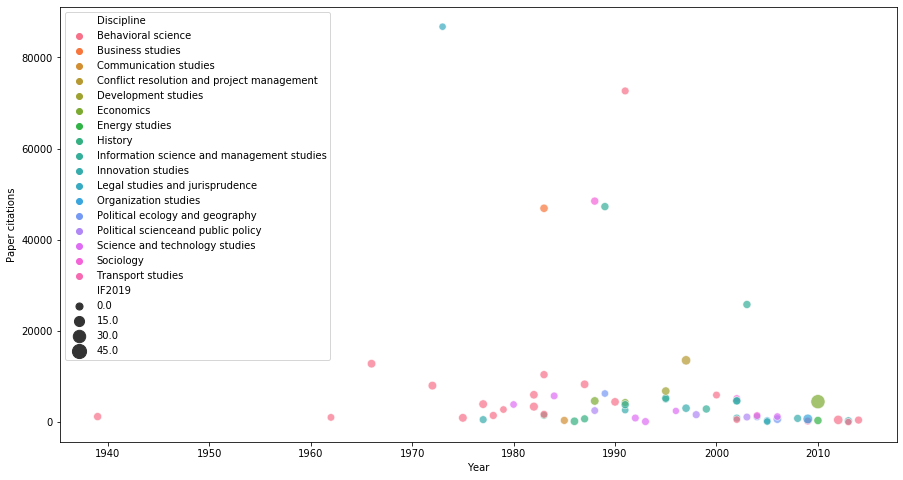

In [7]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="Year", y="Paper citations",
                     hue="Discipline", size="IF2019",
                     data=df, legend="brief", sizes=(50,200), alpha=0.7)

**Fig. 1: Evolución de citas totales versus factor de impacto para cada disciplina**

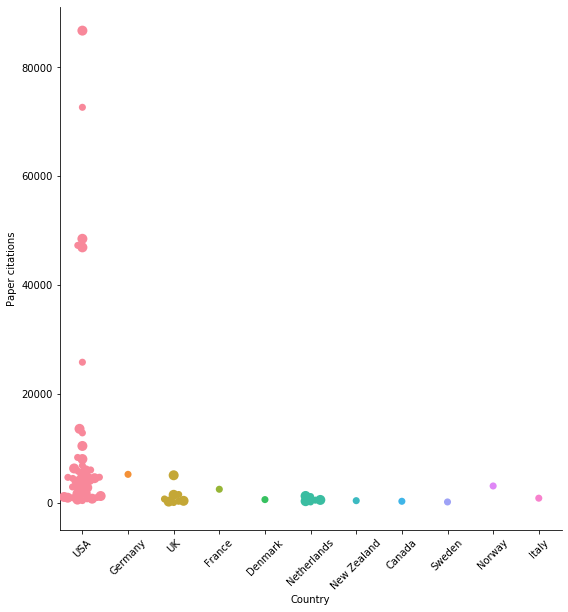

In [8]:
ax2 = sns.catplot(x="Country", y="Paper citations", kind="swarm", data=df, height=8, sizes=(50,100))
ax2.set_xticklabels(rotation=45);


**Fig.2: Distribución de número de citas por país**

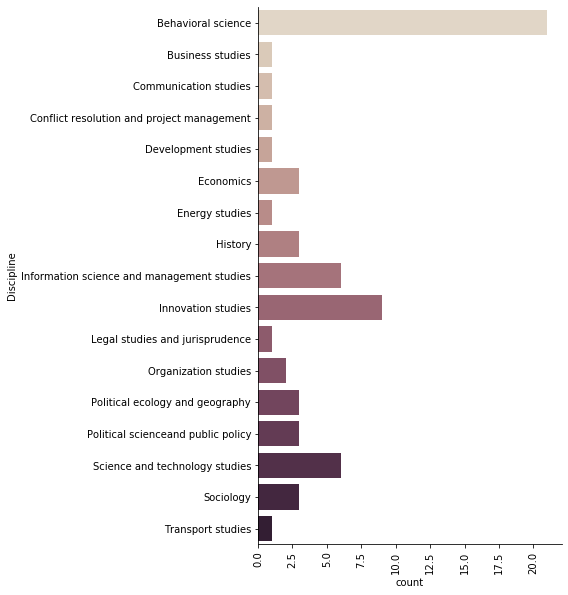

In [9]:
hist = sns.catplot(y="Discipline", kind="count", palette="ch:.25", data=df, height=8)
hist.set_xticklabels(rotation=90);

**Fig.3: histograma de disciplinas**

In [10]:
disciplines = df["Discipline"].value_counts().index.tolist()

In [11]:
disciplines = df["Discipline"].value_counts().index.tolist()
disciplines = disciplines[:5]
df_1 = df[df['Discipline']=="Behavioral science"]
df_2 = df[df['Discipline']=="Innovation studies"]
df_3 = df[df['Discipline']=="Science and technology studies"]

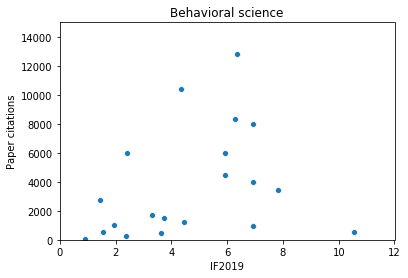

In [12]:
ax = sns.scatterplot(y="Paper citations", x="IF2019",
                    data=df_1, legend=False, sizes=(50,200), ).set_title('Behavioral science')
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,15000]);

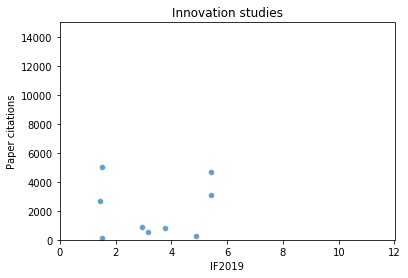

In [13]:
ax = sns.scatterplot(y="Paper citations", x="IF2019",
                    data=df_2, legend=False, sizes=(50,200), alpha=0.7).set_title('Innovation studies')
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,15000]);

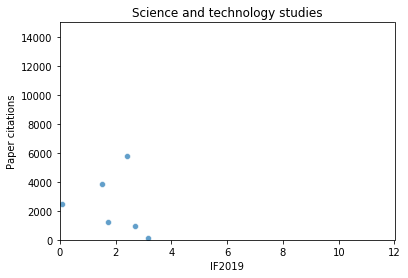

In [14]:
g3 = sns.scatterplot(y="Paper citations", x="IF2019",
                    data=df_3, legend=False, sizes=(50,200), alpha=0.7).set_title('Science and technology studies')
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,15000]);

**Fig. 4,5,6: Número de citas versus factor de impacto para las tres disciplinas más frecuentes**

## Discusión

Partiendo de la limpieza de los datos, una de las observaciones interesantes es que 30% de las teorías identificadas como relevantes se relacionan con autores que publican principalmente en formato libro. En Google Scholar las citas totales de los libros en todos los casos multiplicaban las citas de los papers, más allá del año de publcación. 

En cuanto a los resultados, en la primer figura hubiera esperado encontrar tamaños de burbuja mayor (factor de impacto) hacia arriba del cuadro, reflejando que las teorías con más citas corresponden a aquellas publicadas en revistas de alto impacto. Sin embargo esta tendencia no sucede: para todas las disciplinas el mayor número de citas se asocia a revistas con factor de impacto bajo dentro de la muestra.

A partir del primer gráfico también esperaría encontrar más citas en publicaciones más antiguas por un factor de acumulación. Sin embargo no sucede, la mayor cantidad de citas se ubica aldedor de los años 90. Esto podría estar relacionado a lo que en otras disciplinas se observa como "recency bias" (Kanasky, 2014), o la tendencia a pensar que información más reciente es más valiosa que la menos reciente. Esta tendencia no se observó en los registros descartados por publicar en formato libro, cuyas citas sí se acumularon a través del tiempo.

El gráfico dos muestra cómo Estados Unidos es el principal productor de teorías en el campo de relaciones ciencia-tecnología-sociedad, seguido por el Reino Unido y los Países Bajos. Como mencionan los autores originales del artículo analizado, se observa el sesgo hacia teorías de países europeos/norteamericanos. 

Las figuras 4, 5 y 6 muestran la correlación entre factor de impacto y citas para las tres disciplinas más frecuentes identificadas en la figura 3. Nuevamente lo que se esperaría es encontrar valores más altos en el eje y hacia la derecha del eje x. Aunque en ninguna de las figuras la correlación es determinante, en el campo de Behavioral Science podría existir una tendencia. 

### Conclusiones y próximos pasos

El objetivo de este trabajo consistió en explorar la relación entre dos formas de evaluar contribuciones a la producción del conocimiento: los indicadores bibliométricos de impacto y la evaluación de expertos. 

Las dos teorías identificadas como más relevantes (Socio-technical Transitions Theory, Social Practice Theory) siguen la tendencia general de baja correlación entre factor de impacto y número de citas. Podría indicar que los sistemas de valoración son diferentes en ambos métodos de evaluación, y que especialmente en el campo de la teoría y de las ciencias sociales, los indicadores bibliométricos no estarían captando el valor de las contribuciones a la disciplina. 

El objetivo inicial del trabajo era entender cómo la valoración de expertos puede reflejar los sesgos que derivan de la falta de representación en ciencia. Los autores del artículo analizado recomiendan indagar sobre las escuelas y teorías **no presentes** en los resultados, dados los siguientes sesgos identificados en su muestreo de expertos:
- De disciplina: se privilegian las incluidas en STS versus estudios culturales u otras humanidades,
- De seniority: se privilegian investigadores senior, altamente citados, se incluye algunos "cutting-edge" junior,
- Geográfico: no se relevan investigadores en instituciones fuera de Europa y Norteamérica, 
- De género: mayoría de investigadores hombres, reflejando las redes personales de los autores y que se supone es el campo en general.

Aunque algunos de los sesgos como el geográfico se ven en los resultados, por falta de tiempo no pude incluir una segunda parte del análisis orientada a ese objetivo inicial. En ella iba a incluir una comparación entre los índices h de los teóricos identificados como más relevantes versus los índices h de otras autoras que estoy utilizando en mi tesis, dentro de la escuela de los estudios feministas de la ciencia y la tecnología. Aunque esta escuela hizo aportes prominentes desde los años '70, no figuran en el listado provisto por los expertos.

Creo que resulta interesante realizar este tipo de evaluaciones dentro del propio campo para entender cómo estos indicadores contribuyen a moldear la disciplina. Además, como una forma de estar atento a evitar estos sesgos e incorporar una diversidad de autores a nuestro trabajo cuando sea posible.

Para ilustrar algunos de los problemas "colaterales" de las malas prácticas de evaluación científica cierro con una captura de un artículo publicado en Nature ayer: [More South Korean academics caught naming kids as co-authors](https://www.nature.com/articles/d41586-019-03371-0).

![](Korea.png)

## Bibliografía 

- Alperin, J., & Costas, R. (n.d.). World scaled by number of documents with authors from each country. Retrieved November 11, 2019, from http://scholcommlab.ca/cartogram/
- Cronin, B., & Sugimoto, C. R. (Eds.). (2014). Beyond bibliometrics: Harnessing multidimensional indicators of scholarly impact. MIT Press.
- Daba, Mekonnen H. (2019). List of Journal impact factor 2019. 
- Hicks, D., Wouters, P., Waltman, L. et al. Bibliometrics: The Leiden Manifesto for research metrics. Nature 520, 429–431 (2015) doi:10.1038/520429a
- Intemann, K. (2009). Why diversity matters: Understanding and applying the diversity component of the National Science Foundation’s broader impacts criterion. Social Epistemology, 23(3-4), 249-266.
- Kanasky,   B.   (2014).   The   primacy   and   recency   effects:   The   secret   weapons   of   opening statements. Trial Advocate Quarterly, Summer 2014, 26-29 
- Nature Editorial. (2018). Science benefits from diversity. Nature, 558(5).
- O’Connor, J. (2018). Libraries: Assessing Article and Author Influence: Finding an Author’s H-Index. Retrieved November 11, 2019, from https://libguides.bc.edu/articleinfluence/hindex
- Stirling, A. (2007). A general framework for analysing diversity in science, technology and society. Journal of the Royal Society Interface, 4(15), 707-719.
- United Nations Educational, Scientific and Cultural Organization. (2015). UNESCO Science Report: Towards 2030.
- Valantine, H. A., & Collins, F. S. (2015). National Institutes of Health addresses the science of diversity. Proceedings of the National Academy of Sciences, 112(40), 12240-12242.